In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def graph():    
    import graph
    Graph = graph.H
    return Graph
H = graph()
pos=nx.spring_layout(H) # positions for all nodes


In [3]:
from itertools import combinations
def nodes_in_triangle(H, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(H.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if H.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes
#equetion 1:selection constrain
def selection_constrain_of(i):
     # degree of N_i:
        N_i = subgraph_of(i).number_of_nodes()
        # sum(sdeg_j):
        sum_sdeg_j = subgraph_of(i).number_of_edges()
        # number of triangles: nodes
        NT_i = nx.triangles(H,i)
        if NT_i > 1:
        #equetion 1:selection constrain        
            TR_i = (N_i-(sum_sdeg_j/2))            
        return  TR_i
    
#Selection Algorithm
def Selection_Algorithm():
    # main part of AL loop
    i=0
    valid_set = []
    for i in H.nodes: 
        subgraph = subgraph_of(i)
        # degree of Ni:
        N_i = subgraph.number_of_nodes()
        # number of triangles: nodes
        NT_i = nx.triangles(H,i)
        # Extract the nodes of interest: nodes
        nodes = [n for n, d in subgraph.nodes(data=True)]
        # Create the set of nodes: nodeset
        nodeset = set(nodes)
        #equetion 1:selection constrain
        if NT_i > 1:
            TR_i = selection_constrain_of(i)
            i+=1        
            list1 = i, NT_i     
            valid_set.append(list1)
                
    return  valid_set


# In[ ]:
def sel_subgraphs():
    sel_subgraphs = []
    for i in H:
        sel_subgraph = H.subgraph(nodes_in_triangle(H, i))
        NT_i = nx.triangles(H,i)
        if NT_i > 1:            
            row = i        
            sel_subgraphs.append(row)
    return  sel_subgraphs

# In[ ]:
#return subgraphs
def subgraph_of(i):
    subgraph = H.subgraph(nodes_in_triangle(H, i))
    return  subgraph

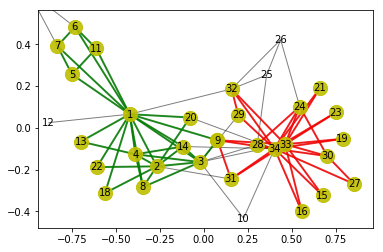

In [6]:
# nodes
nodes1 = list(subgraph_of(1).nodes)
nx.draw_networkx_nodes(H,pos,nodelist=nodes1,node_color='y', node_size=200, alpha=0.9)

nodes2 = list(subgraph_of(34).nodes)
nx.draw_networkx_nodes(H,pos,nodelist=nodes2,node_color='y',node_size=200,alpha=0.9)

#nodes3 = list(subgraph_of(46).nodes)
#nx.draw_networkx_nodes(H,pos,nodelist=nodes2,node_color='b',node_size=100,alpha=0.8)

# edges
nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)
node1 = list(subgraph_of(1).edges)
node2 = list(subgraph_of(34).edges)
#node3= list(subgraph_of(46).edges)

nx.draw_networkx_edges(H,pos,edgelist=node1, width=2,alpha=0.8, edge_color='g')
nx.draw_networkx_edges(H,pos,edgelist=node2, width=2,alpha=0.8, edge_color='r')
#nx.draw_networkx_edges(H,pos,edgelist=node3, width=5,alpha=0.5, edge_color='y')

nx.draw_networkx_labels(H,pos,with_labels = True,font_size=10)
#plt.axis('off')
#plt.show()
#plt.savefig("label1.png") 

In [5]:
H.degree(4)

6